# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**

Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!

> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.





Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

In [1]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden


### Füge hier alle benötigten Libaries ein:
---

In [2]:
import importlib
import subprocess
import sys

def install_and_import(package):
    try:
        # Überprüfen, ob das Paket bereits installiert ist
        importlib.import_module(package)
        print(f"'{package}' ist bereits installiert.")
    except ImportError:
        # Falls das Paket nicht installiert ist, wird es installiert
        print(f"'{package}' wird installiert.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


install_and_import('scipy')  # Ersetzt 'numpy' mit dem gewünschten Paketnamen

'scipy' ist bereits installiert.


## Manuelle Installation 
---

In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import numpy as np

#### Lese hier deine Daten ein:
---

gebe dazu in den "`Path to your file"` wo deine Datei liegt, sowie den passenden Seprator

In [41]:
df = pd.read_csv(filepath_or_buffer= "Data/wage.csv", 
                 sep=';')

#### Begutachte deine Daten:

In [42]:
# gebe dir die ersten 5 reihen des Datensatzes aus:
df.head()

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1


In [ ]:
Reihen, Spalten = df.shape

# gebe die Anzahl der Reihen und Spalten aus:
print("Anzahl der Reihen: ", Reihen)
print("Anzahl der Spalten: ", Spalten)

## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    998 non-null    float64
 1   educ    998 non-null    int64  
 2   exper   998 non-null    int64  
 3   metro   998 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 31.3 KB


Wir können auch *Datentypen* von Spalten ändern, um die Analyse zu erleichtern.
*Datentypen* sind wichtig für die Analyse, da sie bestimmen, welche Operationen auf den Daten durchgeführt werden können.

Wenn wir ein `String` auf ein `int` haben können wir keine Rechen Operationen durchführen. 
Wie Mitterwert, Median, Standardabweichung, Varianz, etc.
Daher ist es wichtig die *Datentypen* zu kennen und zu ändern.

In [ ]:
df['metro'] = df['metro'].astype('category')

Im folgenden Code wirst du eine Statitische Zusammenfassung des Datensatzes erhalten.
Nimm dir eigene Minuten Zeit dein Daten satz zu analysieren und die wichtigsten Informationen herauszufinden.

- Hinterfrage deine Daten und versuche Zusammenhänge zu finden.

In [9]:
df.describe().round(3)


# save output of the describtion as a text file
with open('MLP_Output/out.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

,wage,educ,exper,metro
count,998.000,998.000,998.000,998.000
mean,10.228,13.287,18.794,0.809
std,6.244,2.470,11.317,0.394
min,2.070,1.000,0.000,0.000
25%,5.530,12.000,10.000,1.000
50%,8.825,13.000,18.000,1.000
75%,12.840,16.000,26.000,1.000
max,60.190,18.000,52.000,1.000


Solltest du im folgenden mehrere NaN values haben, wähle eine der folgenden Optionen:
1. Lösche die Zeilen mit NaN values
2. Fülle die NaN values mit einem Wert deiner Wahl
3. Fülle die NaN values mit dem Durchschnittswert der Spalte (mean, mode, median)

In [10]:
df.isnull().sum()

wage     0
educ     0
exper    0
metro    0
dtype: int64

In [11]:
# Entferne Zeilen mit fehlenden Werten (NaN)
df = df.dropna()



# Fülle NaN-Werte mit dem Durchschnitt jeder Spalte
df = df.fillna(df.mean())



# Alternativ: Fülle NaN-Werte einer bestimmten Spalte (z.B. 'Wage') mit deren Durchschnitt
df['Wage'] = df['Wage'].fillna(df['Wage'].mean())

## Filterung der Daten

weitere Informationen findest du im Leitfaden
Daten filterung:

1. Filterung nach einer Kondition:

`df_filtered = df[df["wage"] > 12.00]`

In [12]:
df_filtered = df[df["wage"] > 12]
df_filtered

,wage,educ,exper,metro
698,12.020000,18,8,1
699,12.030000,16,1,1
700,12.030000,12,17,1
701,12.030000,16,14,1
702,12.030000,16,9,1
...,...,...,...,...
993,35.419998,18,23,1
994,36.840000,16,7,1
995,41.320000,16,11,1
996,47.220001,18,35,1


2. Filterung mit mehreren Kondition 

`df_filtered_educ = df[(df["wage"] > 12.00) & (df["educ"] == 12)]`

In [13]:
df_filtered_educ = df[(df["wage"] > 12.00) & 
                      (df["educ"] == 12) & 
                      (df["metro"] == 0) &
                      (df["exper"] > 1) ] # Beachte das du nun deine gewünschte Spalten namen hinzufügen musst
df_filtered_educ

,wage,educ,exper,metro
723,12.400000,12,25,0
760,13.100000,12,24,0
810,14.730000,12,42,0
862,16.209999,12,29,0
866,16.370001,12,22,0
902,18.330000,12,40,0
975,26.980000,12,45,0


# Visualisierungen:

In [14]:
if not os.path.exists("Vis"):
    print("Ordner Vis erstellt")
    os.makedirs("Vis") 
elif os.path.exists("Vis"):
    print("Ordner Vis ist bereits vorhanden")

Ordner Vis ist bereits vorhanden


## Histogramm
---

Text(0.5, 1.0, 'Histogramm des Lohns')

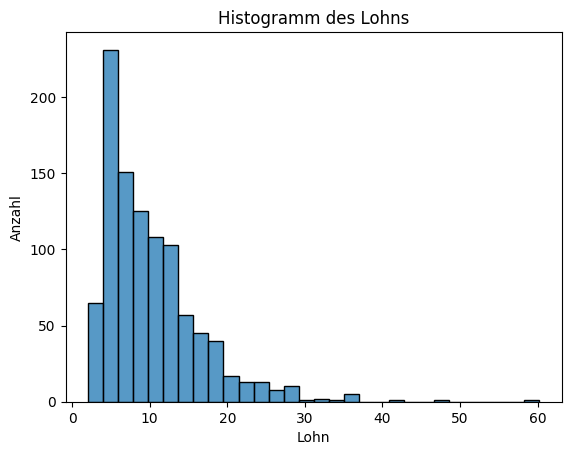

In [15]:
sns.histplot(data=df, x="wage", bins=30)
plt.xlabel("Lohn")
plt.ylabel("Anzahl")
plt.title("Histogramm des Lohns")
# plt.savefig("Vis/Title_") # speicher die Visualisierung

### Korrelations Matrix
---
Folgenden Methoden sind möglich: `pearson, kendall, spearman`

<Axes: >

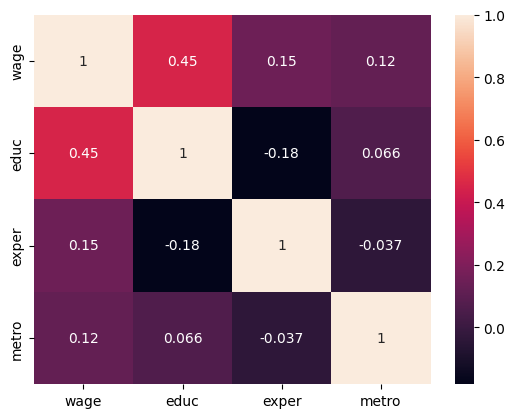

In [16]:
sns.heatmap(df.corr(method = "pearson", numeric_only=True), annot=True) 
# in "method" kann du folgenden Mehthoden aussuchen pearson, kendall, spearman
# plt.savefig("Vis/Title_")

## Scatterplot
---

Text(0.5, 1.0, 'Scatterplot von Erfahrung und Lohn')

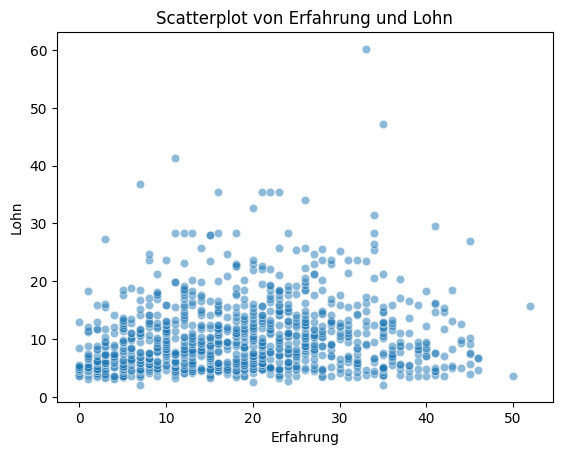

In [17]:
sns.scatterplot(data=df, x="exper", y="wage", alpha=0.5) # alpha fügt transparenz hinzu
plt.xlabel("Erfahrung")
plt.ylabel("Lohn")
plt.title("Scatterplot von Erfahrung und Lohn")
# plt.savefig("Vis/Title_") 

## Balkendiagramm
---

Text(0.5, 1.0, 'Metro und Lohn')

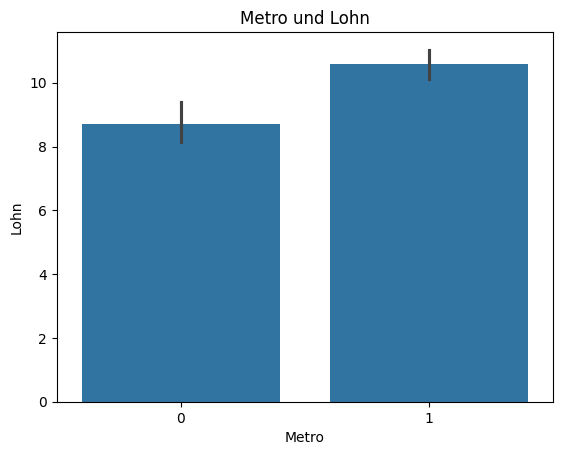

In [18]:
sns.barplot(data=df, x="metro", y="wage")
plt.xlabel("Metro")
plt.ylabel("Lohn")
plt.title("Metro und Lohn")
# plt.savefig("Vis/Title_")

## Regressions Analyse
---
Packages

In [19]:
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Lege deine Abhängige und Unabhänige Varaible fest

In [20]:
X = df[["educ", "exper", "metro"]]
y = df["wage"]

### Erstelle deine Regression:
1. Möglichkeit:

In [21]:
X = sm.add_constant(X)
model_stats = sm.OLS(y, X)
model = model_stats.fit()

print(model.summary())


with open('Regression_Output/summary.txt', 'w') as fh:
    fh.write(model.summary().as_text()) # Speicher dein Regressions Ergebnis in einer Text Datei in dem Odner Regression Output

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        15:17:31   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.077     -9.154      0.0

In [22]:
parameter = model.params
parameter

const   -9.858057
educ     1.232183
exper    0.132734
metro    1.509102
dtype: float64

Formel: y_hat = intercept + b1 * educ + b1 * exper + b1 * educ + b1 * metro

In [23]:
educ = 0
exper = 0
metro = 0

y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro

y_hat

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_48240/665475828.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = parameter[0] + parameter[1] * educ + parameter[2] * exper + parameter[3] + metro


np.float64(-8.348954639686218)

### 2. Möglicheit die mehr an R erinnert:

In [24]:
from statsmodels.formula.api import ols 
linear_model = ols('wage ~ educ + exper + metro', 
                   data=df).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.06e-66
Time:                        15:17:31   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8581      1.077     -9.154      0.000     -11.971      -7.745
educ           1.2322      0.070     17.609      0.000       1.095       1.369
exper          0.1327      0.015      8.703      0.000       0.103       0.163
metro          1.5091      0.432      3.493      0.000       0.661       2.357
==============================================================================
Omnibus:                      412.972   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2861.174
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                      10.526   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Konfidenz Intervalle:
---

In [25]:
# Calculate the 99% confidence intervals for the model's parameters
conf_intervals = linear_model.conf_int(alpha=0.01)
conf_intervals = conf_intervals.rename(columns={0: '0.5 %', 1: '99.5 %'})
conf_intervals


,0.5 %,99.5 %
Intercept,-12.637365,-7.078748
educ,1.051598,1.412768
exper,0.093375,0.172094
metro,0.393965,2.624239


## Vorhersagen treffen:

In [26]:
prediction = linear_model.predict(df[["educ","exper","metro"]])
prediction[:5] # Die ersten 5 Vohersagen, um alle zu sehen entferne die [:5]

0     7.366383
1    11.082949
2    14.020664
3     9.622870
4     8.200363
dtype: float64

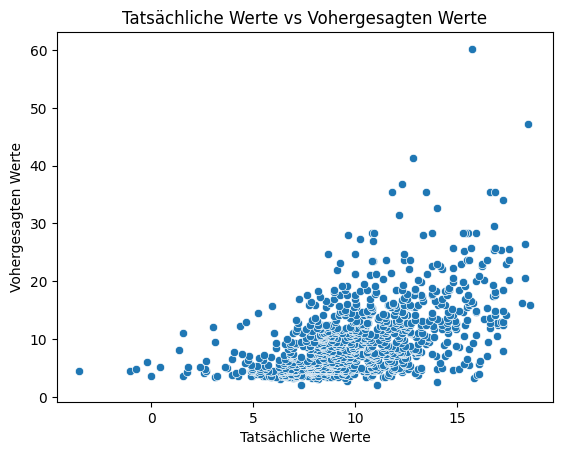

In [27]:
sns.scatterplot(x=prediction, y=df["wage"])
plt.title("Tatsächliche Werte vs Vohergesagten Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vohergesagten Werte")
plt.savefig("Vis/Title_")

## Residuale 
---

### Residuale berechen

1. Möglichkeit durch eine eingbaute Funktion:

In [28]:
residuals = linear_model.resid
residuals

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

2. Möglichkeit eigene berechnung:

In [29]:
residuals_model = df["wage"] - prediction # tatsächliche Werte - Vorhersagen
residuals_model

0      -5.296383
1      -8.962949
2     -11.480664
3      -6.942870
4      -5.110363
         ...    
993    18.536765
994    24.544885
995    28.493947
996    28.743954
997    44.443787
Length: 998, dtype: float64

In [30]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df["wage"] - df["wage"].mean())**2).sum()

# R-squared
R_squared = 1 - (SSResiduals/SSTotal)
print("R_squared:", R_squared)

R_squared: 0.2661773034647066


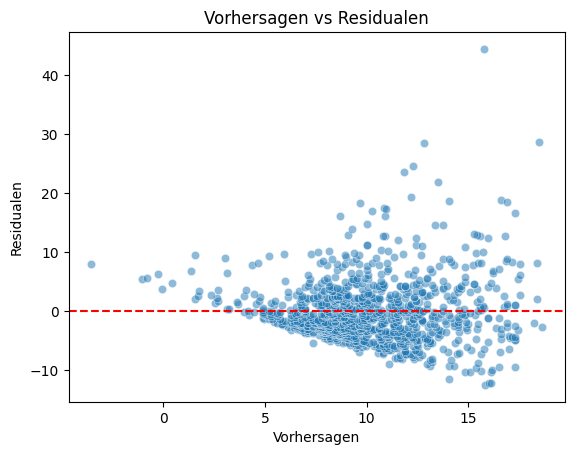

In [31]:
# Vorhersagen (Predictions)
predictions = linear_model.fittedvalues

# Scatterplot der Vorhersagen gegen Residualen
sns.scatterplot(x=predictions, y=residuals, alpha = 0.5)
plt.title("Vorhersagen vs Residualen")
plt.axhline(y = 0, color = 'r', linestyle = '--') # fügt eine rote horziontale Linie hinzu
plt.xlabel("Vorhersagen")
plt.ylabel("Residualen")
plt.savefig("Vis/Title_Residuals_vs_Predictions.png")
plt.show()


In [32]:
print(linear_model.fittedvalues.mean())
print(linear_model.predict().mean())

10.228276573146296
10.228276573146296


<Axes: >

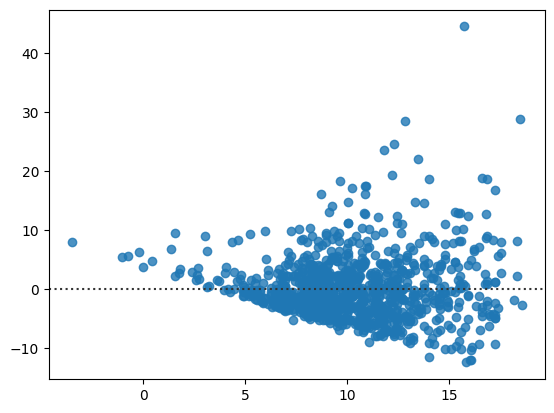

In [33]:
sns.residplot(x=prediction, y=residuals)

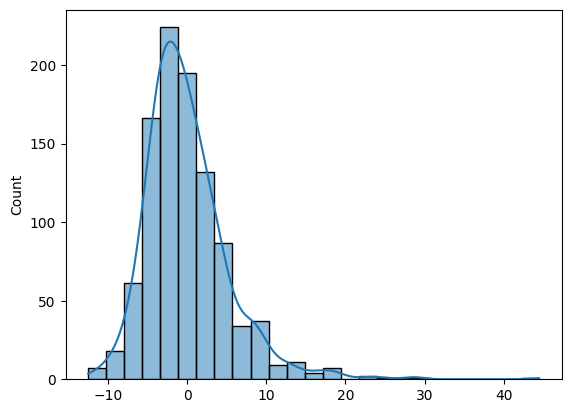

In [34]:
model_residuals = model.resid
sns.histplot(model_residuals, kde=True, bins=25)
plt.savefig("Vis/Title_")

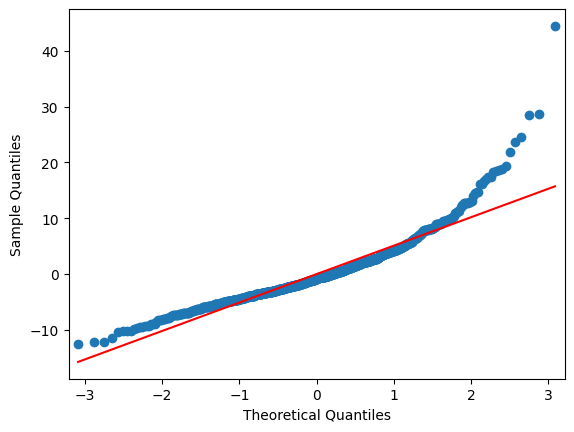

In [35]:
fig = sm.qqplot(residuals, line="r")
plt.show()

### Analysis of variance (Anova)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

             df        sum_sq      mean_sq           F        PR(>F)
educ        1.0   7864.802216  7864.802216  274.111805  1.465272e-54
exper       1.0   2130.117614  2130.117614   74.240950  2.684887e-17
metro       1.0    349.980991   349.980991   12.197881  4.994939e-04
Residual  994.0  28519.798334    28.691950         NaN           NaN


## Simple Lineare Regression aufbauen
---

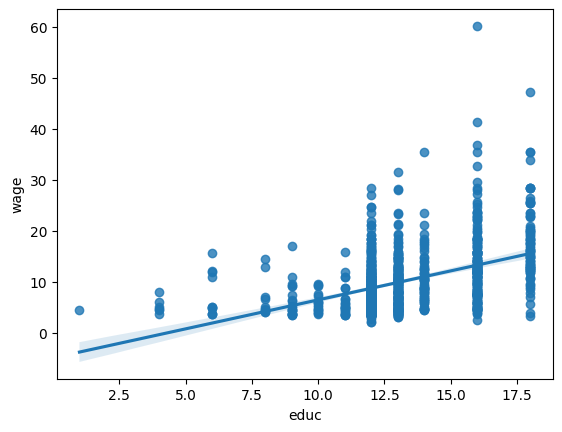

In [37]:
sns.regplot(data = df, x="educ", y ="wage")
plt.savefig("Vis/Title_")

<Axes: xlabel='exper', ylabel='wage'>

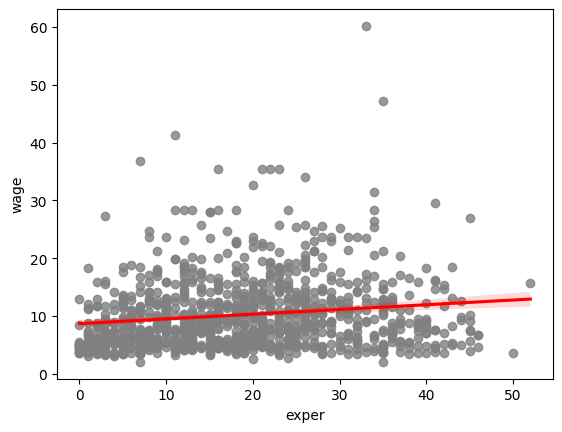

In [38]:
sns.regplot(data = df, x="exper", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})
# plt.savefig("Vis/Title_")

<Axes: xlabel='metro', ylabel='wage'>

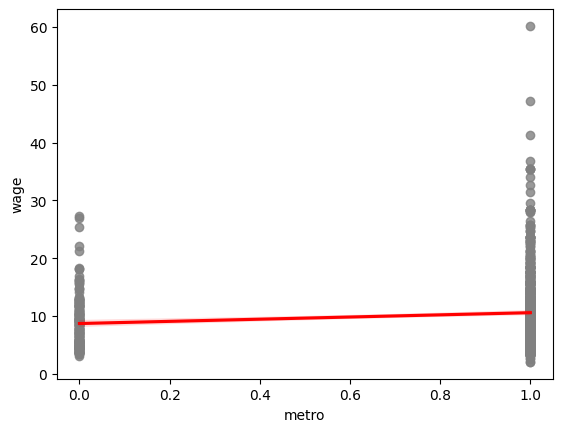

In [39]:
sns.regplot(data = df, x="metro", y ="wage", scatter_kws={'color': 'grey'}, line_kws={'color': 'red'})

# plt.savefig("Vis/Title_")

### Analysis of variance (Anova)

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Daten vorbereiten
#df['metro'] = df['metro'].astype('category')  # Falls "metro" eine binäre Kategorie ist

# Lineares Modell erstellen (OLS = Ordinary Least Squares)
model = smf.ols('wage ~ educ + exper + metro', data=df).fit()

# ANOVA-Test durchführen
anova_results = anova_lm(model)  # Typ 2 ANOVA

# Ergebnisse anzeigen
print(anova_results)

             df        sum_sq      mean_sq           F        PR(>F)
educ        1.0   7864.802216  7864.802216  274.111805  1.465272e-54
exper       1.0   2130.117614  2130.117614   74.240950  2.684887e-17
metro       1.0    349.980991   349.980991   12.197881  4.994939e-04
Residual  994.0  28519.798334    28.691950         NaN           NaN


## Heteroskedasticity testen

In [41]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [42]:
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(
    linear_model.resid, linear_model.model.exog)


print(f"LM Statistic: {bp_lm}")
print(f"LM p-value: {bp_lm_pvalue}")
print(f"F Statistic: {bp_fvalue}")
print(f"F p-value: {bp_f_pvalue}")

LM Statistic: 42.76916568859225
LM p-value: 2.7549846935235586e-09
F Statistic: 14.835000842180893
F p-value: 1.872207806675279e-09


In [43]:
ols = sm.OLS(y, X).fit(cov_type="HC1")
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     80.93
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           7.59e-47
Time:                        15:17:33   Log-Likelihood:                -3089.0
No. Observations:                 998   AIC:                             6186.
Df Residuals:                     994   BIC:                             6206.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8581      1.213     -8.129      0.0

## Multikollinearität
---

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF Berechnung nur für die Variablen in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Berechne den VIF für jede unabhängige Variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  Feature        VIF
0   const  40.340431
1    educ   1.038221
2   exper   1.035169
3   metro   1.005007


## Polynomial-Regression
---

In [45]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [46]:
ice_creamdf = pd.read_csv("Data/ice_cream_sales.csv", sep=',')
ice_creamdf.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [47]:
X_poly = ice_creamdf["Temperature (°C)"].values.reshape(-1,1)
X_log = sm.add_constant(X_poly)
y_poly = ice_creamdf["Ice Cream Sales (units)"].values

In [55]:
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(X_poly)
xp.shape

(49, 3)

In [56]:
model_poly = sm.OLS(y_poly, xp).fit()
ypred_poly = model_poly.predict(xp) 

ypred_poly.shape

(49,)

In [57]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     315.8
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.35e-27
Time:                        15:18:27   Log-Likelihood:                -125.95
No. Observations:                  49   AIC:                             257.9
Df Residuals:                      46   BIC:                             263.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9518      0.710      4.159      0.000       1.523       4.380
x1            -0.8247      0.175     -4.722      0.000      -1.176      -0.473
x2             1.8295      0.074     24.715      0.000       1.681       1.979
==============================================================================
Omnibus:                        3.209   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.666
Skew:                          -0.101   Prob(JB):                        0.435
Kurtosis:                       2.120   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

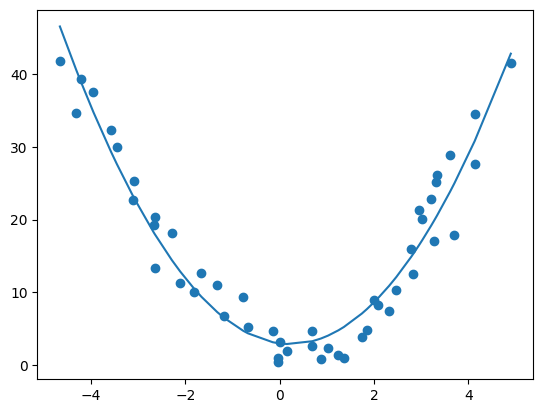

In [58]:
plt.scatter(X_poly,y_poly)
plt.plot(X_poly,ypred_poly)

## Log Log Model:

---

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Beispiel-Daten
data = {
    'X': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 4, 8, 16, 32]
}

df = pd.DataFrame(data)

# Logarithmieren der Variablen
df['log_X'] = np.log(df['X'])
df['log_y'] = np.log(df['y'])

# Hinzufügen einer Konstante für den Intercept
X_log = sm.add_constant(df['log_X'])

# Erstelle das log-log Modell
model = sm.OLS(df['log_y'], X_log)
results = model.fit()

# Ausgabe der Ergebnisse
print(results.summary())

# Vorhersagen treffen
y_pred_log = results.predict(X_log)


                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.76
Date:                Wed, 02 Oct 2024   Prob (F-statistic):            0.00156
Time:                        15:17:33   Log-Likelihood:                -1.2669
No. Observations:                   6   AIC:                             6.534
Df Residuals:                       4   BIC:                             6.117
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3435      0.309     -1.110      0.3

/Users/riccardo/Desktop/Github/Python-Crashkurs/venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
